# Práctica
Aplicar un modelo de recomendación que sugiera materiales educativos personalizados para cada estudiante.

## Variables clave:
- Calificaciones en exámenes anteriores.
- Tiempo dedicado al estudio.
- Asistencia a clases.
- Métodos de aprendizaje utilizados.


### Cargar los datos e importar librerías necesarias.


In [ ]:
import pandas as pd
import zipfile

# Extraer
with zipfile.ZipFile('/content/students-performance-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/students-performance-dataset')

# Construir la ruta completa al CSV extraído
file_path = '/content/students-performance-dataset/Student_performance_data _.csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas del DataFrame
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Exploración y limpieza inicial de datos

### Subtarea:
Examinar la estructura del dataset, identificar variables clave (puntuaciones, tiempo de estudio, asistencia, métodos de aprendizaje), comprobar valores faltantes y preparar los datos para el análisis y la aplicación del modelo.


In [ ]:
print(f"Dimensiones del DataFrame: {df.shape}\n")

Dimensiones del DataFrame: (2392, 15)



In [ ]:
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.45

In [ ]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

print("\nValores únicos y conteos para columnas categóricas:")
for col in categorical_cols:
    if col in df.columns:
        print("\n--- {} ---".format(col))
        print(df[col].value_counts())
    else:
        print("La columna '{}' no se encontró en el DataFrame.".format(col))


Valores únicos y conteos para columnas categóricas:

--- Gender ---
Gender
1    1222
0    1170
Name: count, dtype: int64

--- Ethnicity ---
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64

--- ParentalEducation ---
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

--- Tutoring ---
Tutoring
0    1671
1     721
Name: count, dtype: int64

--- ParentalSupport ---
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

--- Extracurricular ---
Extracurricular
0    1475
1     917
Name: count, dtype: int64

--- Sports ---
Sports
0    1666
1     726
Name: count, dtype: int64

--- Music ---
Music
0    1921
1     471
Name: count, dtype: int64

--- Volunteering ---
Volunteering
0    2016
1     376
Name: count, dtype: int64

--- GradeClass ---
GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


## Ingeniería de características para perfiles de estudiantes

### Subtarea:
Crear o transformar características a partir de las variables clave para construir perfiles completos de estudiantes. Esto puede implicar codificar variables categóricas y normalizar datos numéricos.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Aplicar codificación one-hot a LAS columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Identificar las columnas numéricas.
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Ajustar y transformar las columnas numéricas
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# DataFrame final para perfiles de estudiantes
student_profiles_df = df_encoded.drop(columns=['StudentID'], errors='ignore')

print("Dimensiones del DataFrame de perfiles de estudiantes:", student_profiles_df.shape)

Dimensiones del DataFrame de perfiles de estudiantes: (2392, 35)


In [ ]:
print("Primeras 5 filas del DataFrame de perfiles de estudiantes:")
student_profiles_df.head()

Primeras 5 filas del DataFrame de perfiles de estudiantes:


,Age,StudyTimeWeekly,Absences,GPA,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,...,Sports_1,Music_0,Music_1,Volunteering_0,Volunteering_1,GradeClass_0.0,GradeClass_1.0,GradeClass_2.0,GradeClass_3.0,GradeClass_4.0
0,0.472919,1.780336,-0.890822,1.118086,False,True,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,1.362944,0.997376,-1.717694,1.242374,True,False,True,False,False,False,...,False,True,False,True,False,False,True,False,False,False
2,-1.307132,-0.984045,1.353542,-1.960277,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True
3,0.472919,0.045445,-0.063951,0.161790,False,True,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
4,0.472919,-0.902311,0.290422,-0.675573,False,True,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


## Segmentar estudiantes según los perfiles

### Subtarea:
Aplicar algoritmos de clustering para agrupar estudiantes con características similares. Determinar el número óptimo de clusters mediante el método del codo (Elbow).


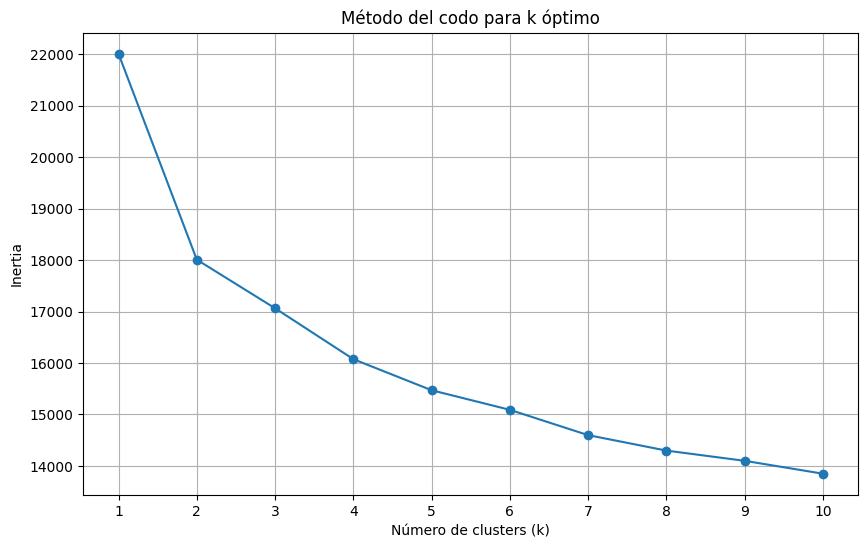

Valores de inertia calculados para diferentes k.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método del codo para determinar k óptimo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(student_profiles_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo para k óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Valores de inertia calculados para diferentes k.")

In [ ]:
optimal_k = 4  # Elegimos 4 :D

In [ ]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
student_clusters = kmeans_final.fit_predict(student_profiles_df)

# Asignar etiquetas de cluster al DataFrame original
df['Cluster'] = student_clusters

print(f"Asignadas {optimal_k} clusters al DataFrame.")


Asignadas 4 clusters al DataFrame.


In [ ]:
print("Primeras 5 filas del DataFrame con la nueva columna 'Cluster':")
df.head()

Primeras 5 filas del DataFrame con la nueva columna 'Cluster':


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Cluster
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,3


## Identificar áreas para recomendaciones personalizadas

### Subtarea:
Para cada segmento, identificar fortalezas y debilidades comunes y formular recomendaciones conceptuales de materiales educativos o áreas de enfoque.


In [ ]:
cluster_summary = df.groupby('Cluster').mean()
print("Media de características numéricas por cluster:")
print(cluster_summary[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']])

Media de características numéricas por cluster:
               Age  StudyTimeWeekly   Absences       GPA
Cluster                                                 
0        17.469136        10.317172   7.246914  2.704660
1        15.499232         9.262626  21.265745  1.183041
2        15.468531        10.507482   7.174825  2.722148
3        17.524917         9.110497  21.139535  1.160843


In [ ]:
# categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
print("\nModa de características categóricas por cluster:")
for col in categorical_cols:
    print("\n--- {} ---".format(col))
    print(df.groupby('Cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else 'No mode'))


Moda de características categóricas por cluster:

--- Gender ---
Cluster
0    1
1    1
2    0
3    1
Name: Gender, dtype: int64

--- Ethnicity ---
Cluster
0    0
1    0
2    0
3    0
Name: Ethnicity, dtype: int64

--- ParentalEducation ---
Cluster
0    2
1    2
2    2
3    2
Name: ParentalEducation, dtype: int64

--- Tutoring ---
Cluster
0    0
1    0
2    0
3    0
Name: Tutoring, dtype: int64

--- ParentalSupport ---
Cluster
0    3
1    2
2    2
3    2
Name: ParentalSupport, dtype: int64

--- Extracurricular ---
Cluster
0    0
1    0
2    0
3    0
Name: Extracurricular, dtype: int64

--- Sports ---
Cluster
0    0
1    0
2    0
3    0
Name: Sports, dtype: int64

--- Music ---
Cluster
0    0
1    0
2    0
3    0
Name: Music, dtype: int64

--- Volunteering ---
Cluster
0    0
1    0
2    0
3    0
Name: Volunteering, dtype: int64

--- GradeClass ---
Cluster
0    3.0
1    4.0
2    3.0
3    4.0
Name: GradeClass, dtype: float64


### Análisis de segmentos y recomendaciones

Se identificaron cuatro segmentos de estudiantes con características distintas; a continuación se resumen perfiles y recomendaciones conceptuales para cada cluster.


**Cluster 0: Estudiantes mayores, buen rendimiento y ausencias moderadas**
- Perfil: Estudiantes de mayor edad (promedio ~17.5 años) con buen rendimiento académico (GPA ~2.7), tiempo de estudio moderado y ausencias moderadas (aprox. 7 por semestre).
- Fortalezas: Buen desempeño académico y hábitos de estudio estables.
- Debilidades: Ausencias moderadas que pueden indicar descompromiso ocasional.
- Recomendaciones: materiales de enriquecimiento, oportunidades de mentoría y seguimiento de asistencia.

**Cluster 1: Estudiantes jóvenes, bajo rendimiento y altas ausencias**
- Perfil: Estudiantes más jóvenes (promedio ~15.5 años) con bajo GPA (~1.18) y muchas ausencias (aprox. 21 por semestre).
- Fortalezas: Edad temprana, potencial para intervención.
- Debilidades: Bajo rendimiento y elevada absentismo.
- Recomendaciones: intervención personalizada, tutorías, acciones para mejorar la asistencia y mayor implicación familiar.

**Cluster 2: Estudiantes jóvenes, buen rendimiento y bajas ausencias**
- Perfil: Estudiantes jóvenes (promedio ~15.5 años) con buen GPA (~2.72) y bajas ausencias (aprox. 7).
- Fortalezas: Buen desempeño y hábito de estudio consistente.
- Debilidades: Pueden necesitar mayor desafío académico.
- Recomendaciones: programas de enriquecimiento, mentoría y actividades avanzadas.

**Cluster 3: Estudiantes mayores, bajo rendimiento y altas ausencias**
- Perfil: Estudiantes de mayor edad (promedio ~17.5 años) con bajo GPA (~1.16) y muchas ausencias (aprox. 21).
- Fortalezas: Posible receptividad a orientación vocacional.
- Debilidades: Riesgo de deserción por bajo rendimiento y absentismo.
- Recomendaciones: apoyo intensivo, opciones educativas flexibles y orientación profesional.


## Visualizar segmentos e insights

### Subtarea:
Crear visualizaciones que ilustren los diferentes segmentos, sus características clave y la justificación de las recomendaciones conceptuales. Incluir leyendas adecuadas.


/tmp/ipython-input-2524658033.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='viridis', dodge=False)
/tmp/ipython-input-2524658033.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='viridis', dodge=False)
/tmp/ipython-input-2524658033.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='viridis', dodge=False)
/tmp/ipython-input-2524658033.py:12: FutureWarning: 

Passing `pale

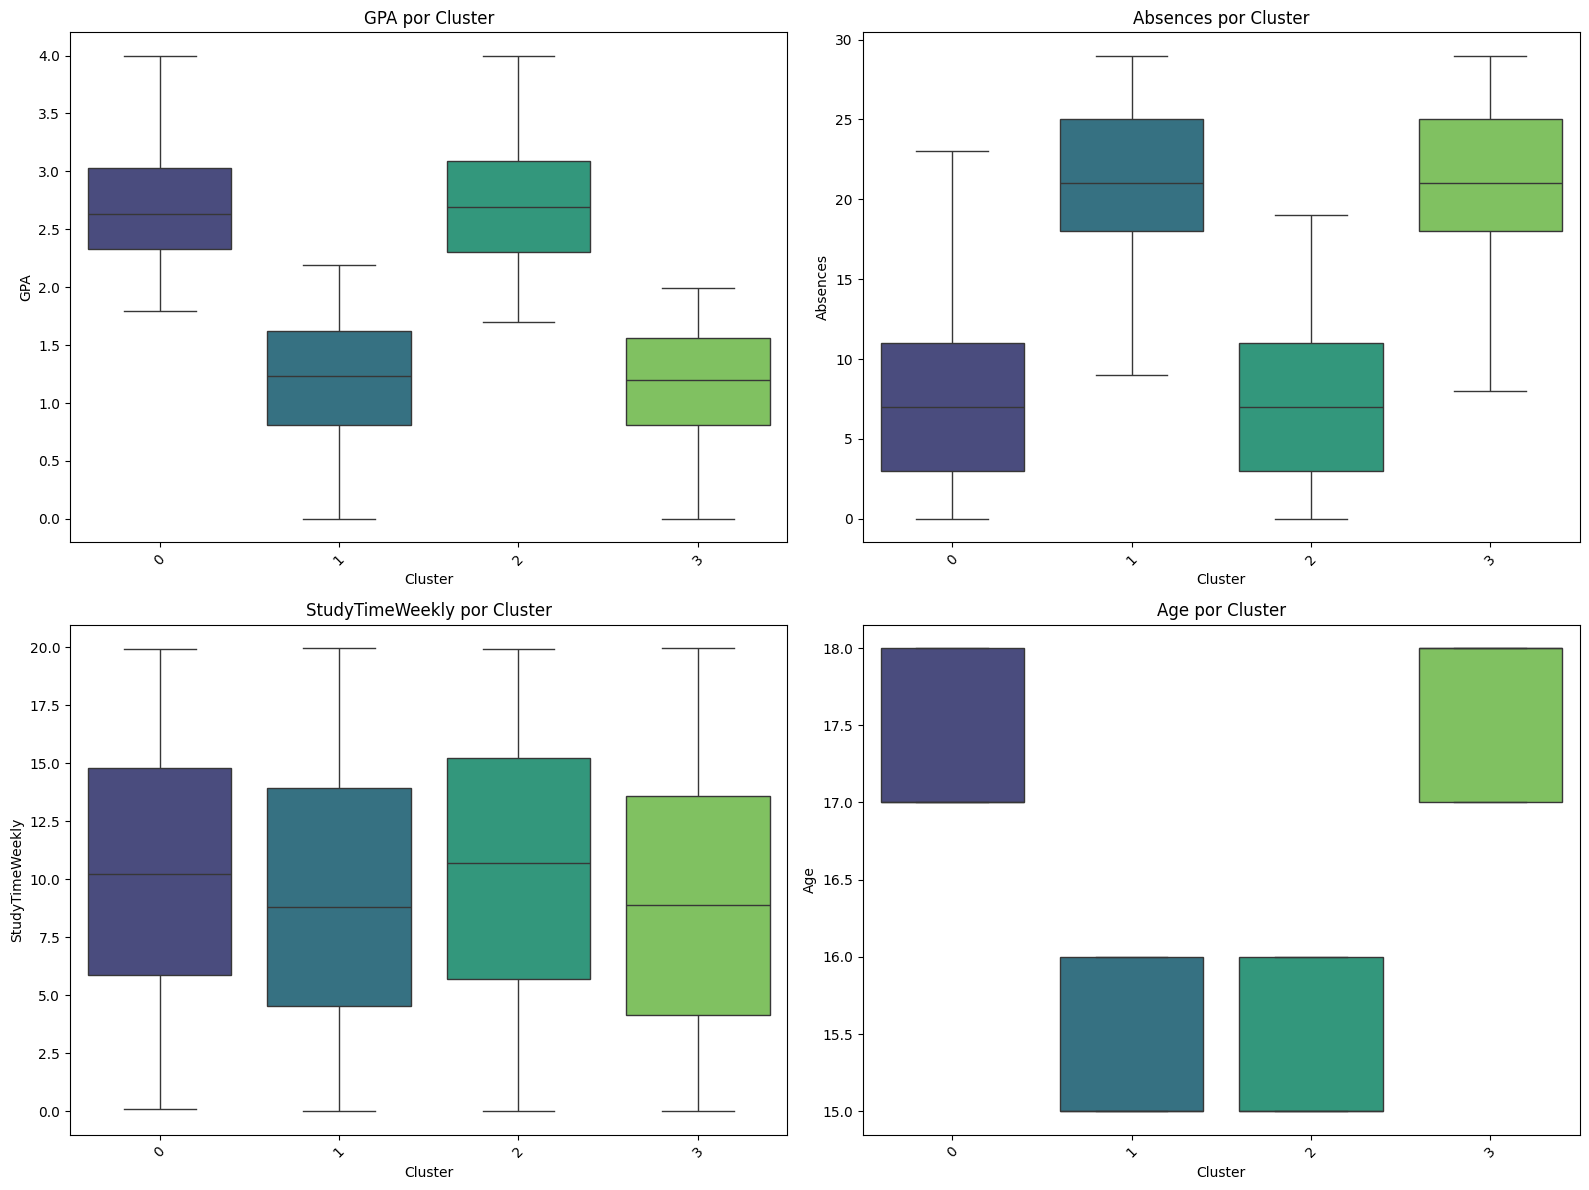

Se generaron los boxplots de las características numéricas por cluster.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Características numéricas a visualizar
features_to_plot = ['GPA', 'Absences', 'StudyTimeWeekly', 'Age']

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Aplanar para iterar

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='viridis', dodge=False)
    axes[i].set_title(f'{feature} por Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
print("Se generaron los boxplots de las características numéricas por cluster.")

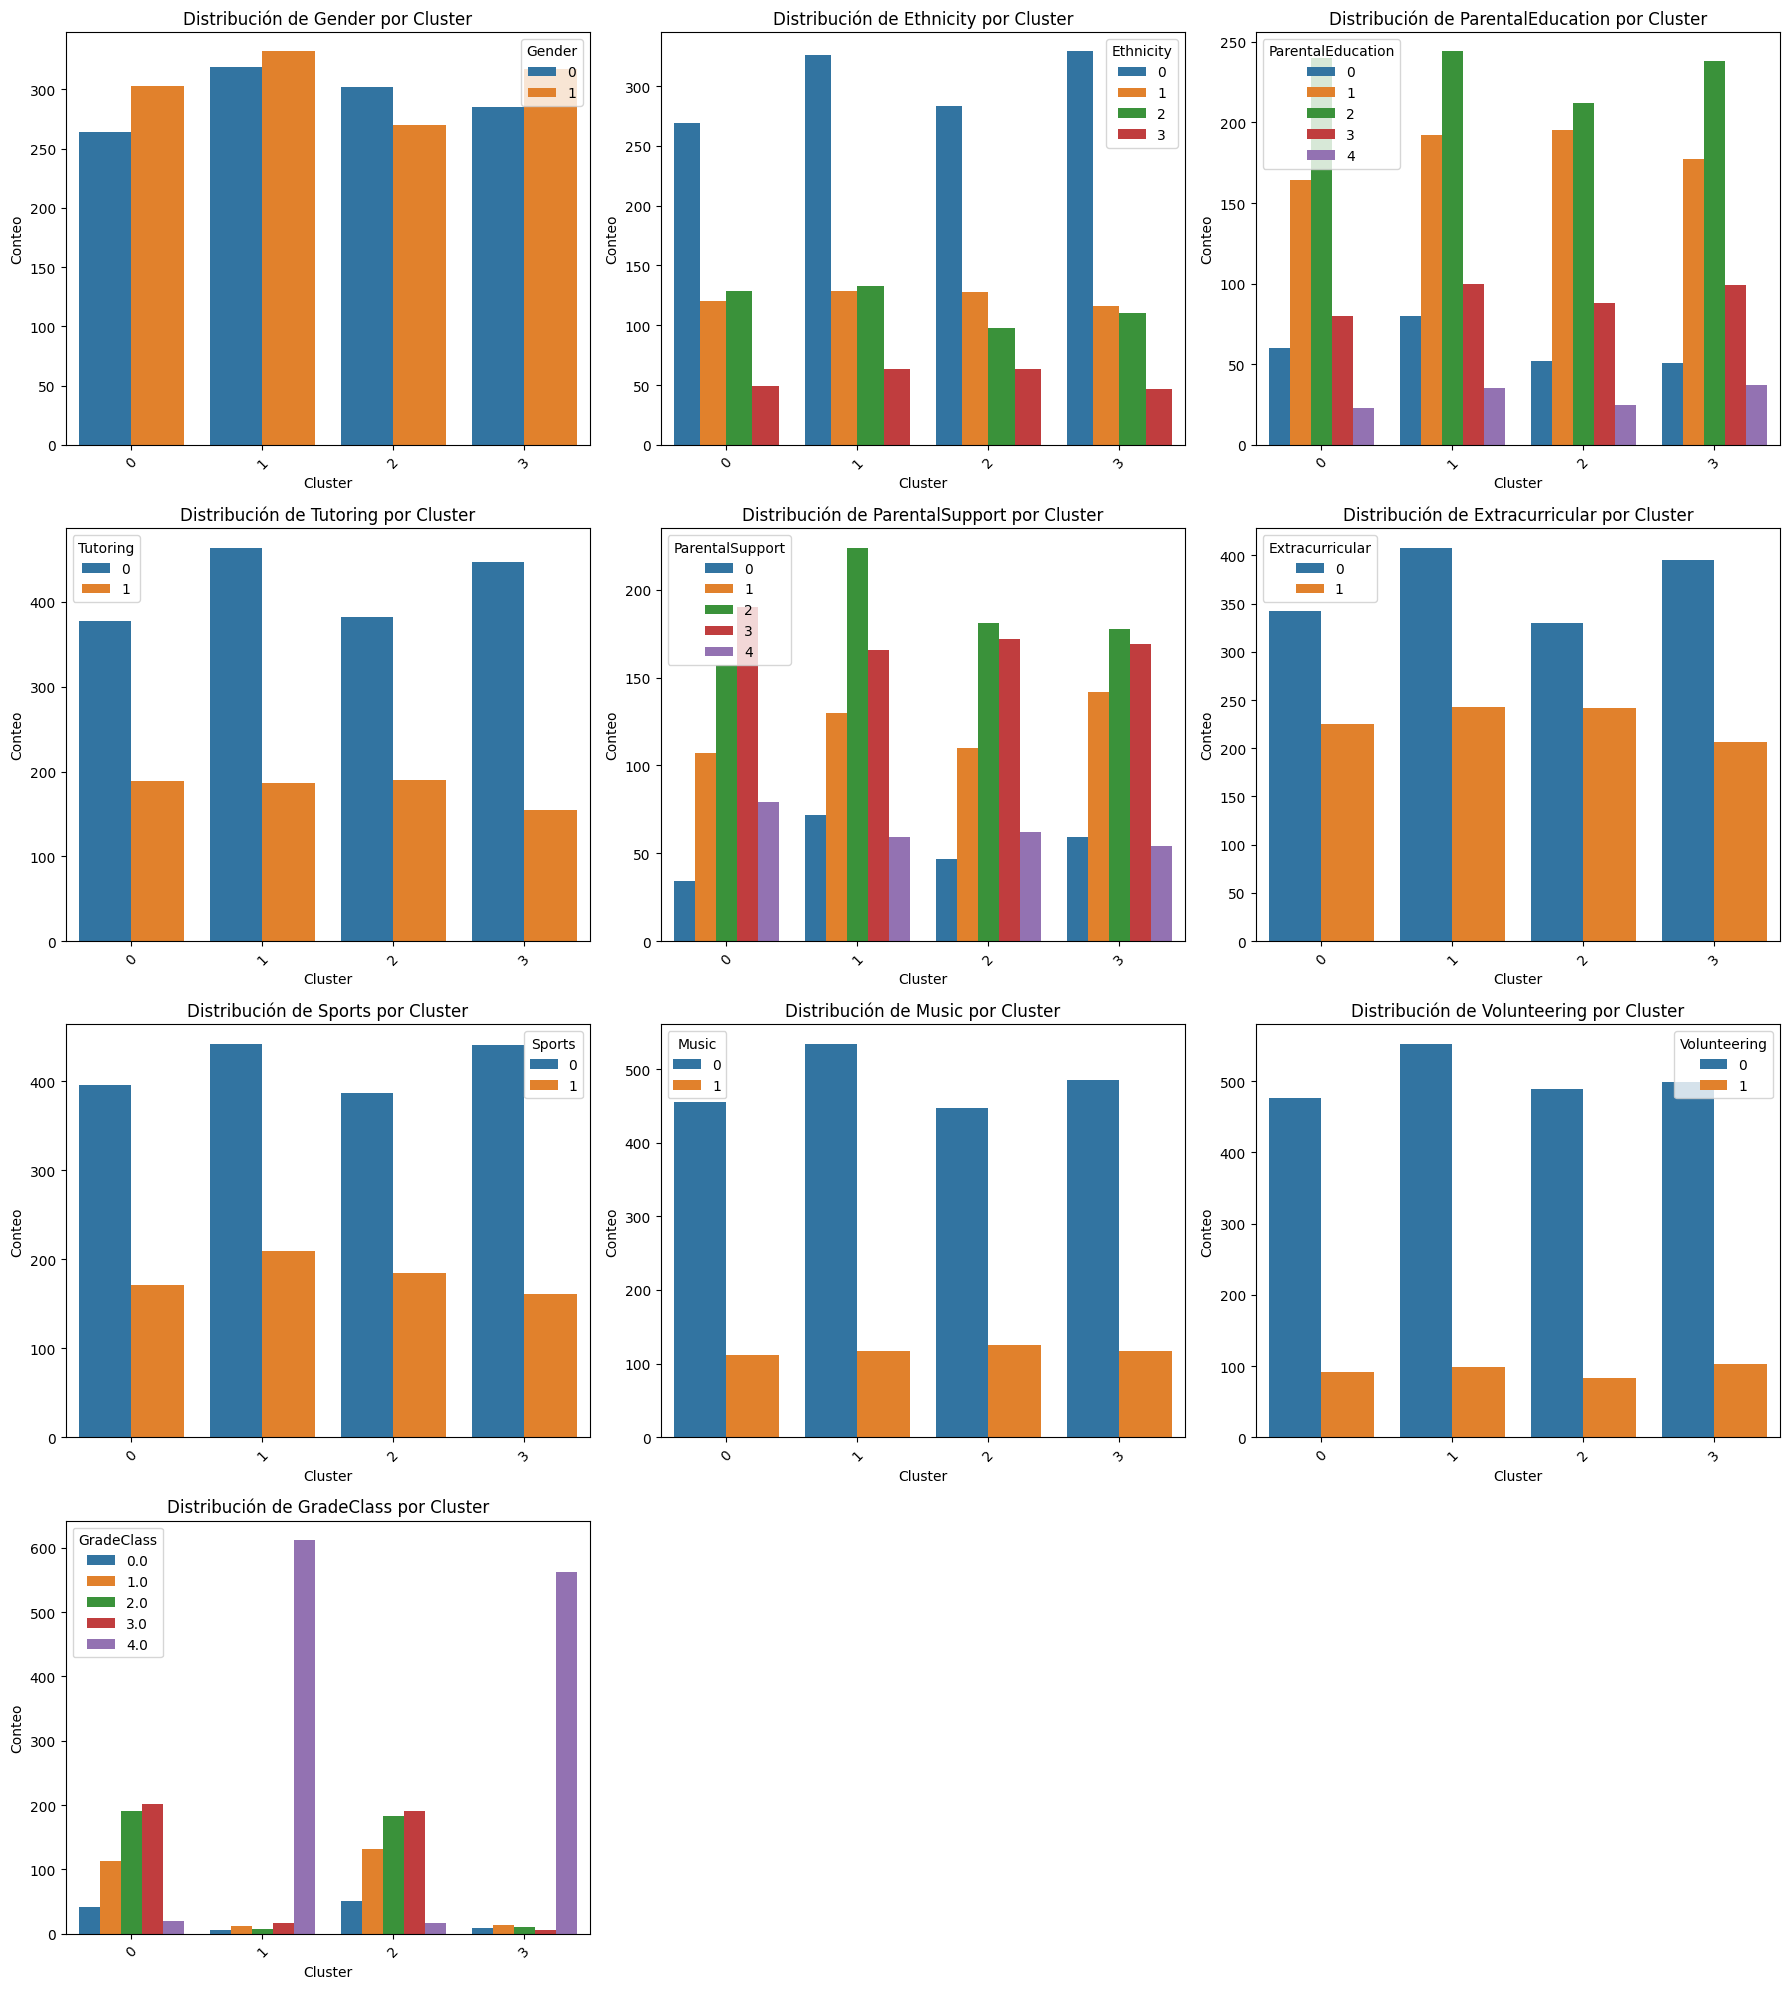

Se generaron los countplots de las características categóricas por cluster.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features_to_plot = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

n_features = len(categorical_features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(categorical_features_to_plot):
    if i < len(axes):
        sns.countplot(x='Cluster', hue=feature, data=df, ax=axes[i], palette='tab10')
        axes[i].set_title(f'Distribución de {feature} por Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('Conteo')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title=feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print("Se generaron los countplots de las características categóricas por cluster.")

## Resumen:

### Hallazgos clave del análisis de datos

- **Visión general**: El dataset contiene registros de estudiantes. Verifique el nombre y la ruta del CSV después de descomprimir.
- **Ingeniería de características**: Se aplicó one-hot encoding a variables categóricas y escalado a variables numéricas (Age, StudyTimeWeekly, Absences, GPA).
- **Segmentación**: Se utilizó el método del codo y K-Means para segmentar en 4 clusters.